# Binary Classification

In [11]:
from sklearn.datasets import make_circles
import torch
from torch import nn

In [13]:
# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

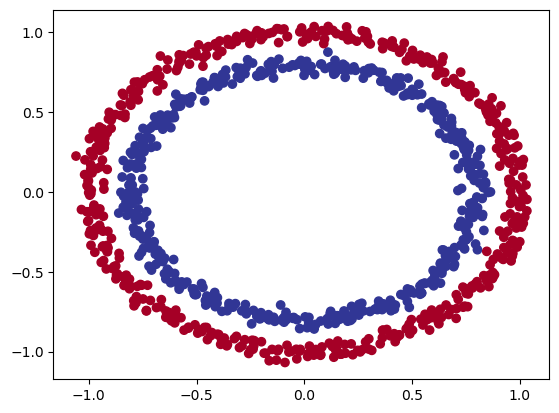

In [3]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [5]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [9]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [15]:
model = nn.Sequential(nn.Linear(2,10),
                      nn.ReLU(),
                      nn.Linear(10,10),
                      nn.ReLU(),
                      nn.Linear(10,1))

In [17]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [21]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [33]:
epochs = 2000

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.33084, Accuracy: 98.62% | Test loss: 0.37196, Test acc: 97.50%
Epoch: 100 | Loss: 0.19978, Accuracy: 100.00% | Test loss: 0.24553, Test acc: 99.00%
Epoch: 200 | Loss: 0.12060, Accuracy: 100.00% | Test loss: 0.16077, Test acc: 99.50%
Epoch: 300 | Loss: 0.07893, Accuracy: 100.00% | Test loss: 0.11464, Test acc: 99.50%
Epoch: 400 | Loss: 0.05571, Accuracy: 100.00% | Test loss: 0.08754, Test acc: 99.50%
Epoch: 500 | Loss: 0.04191, Accuracy: 100.00% | Test loss: 0.07119, Test acc: 99.50%
Epoch: 600 | Loss: 0.03308, Accuracy: 100.00% | Test loss: 0.06036, Test acc: 99.50%
Epoch: 700 | Loss: 0.02706, Accuracy: 100.00% | Test loss: 0.05275, Test acc: 99.50%
Epoch: 800 | Loss: 0.02276, Accuracy: 100.00% | Test loss: 0.04717, Test acc: 99.50%
Epoch: 900 | Loss: 0.01956, Accuracy: 100.00% | Test loss: 0.04293, Test acc: 99.50%
Epoch: 1000 | Loss: 0.01709, Accuracy: 100.00% | Test loss: 0.03954, Test acc: 99.50%
Epoch: 1100 | Loss: 0.01514, Accuracy: 100.00% | Test loss: 0.03680

In [29]:
from helper_functions import plot_predictions, plot_decision_boundary

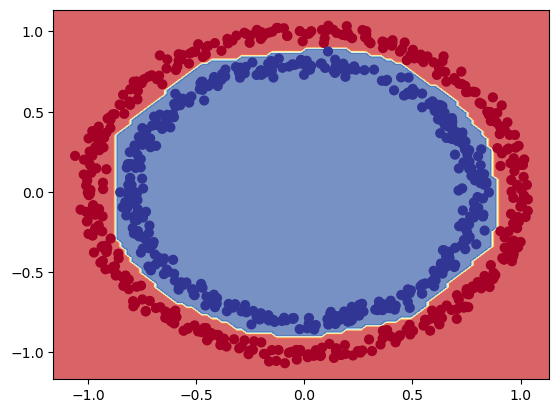

In [35]:
plot_decision_boundary(model, X_train, y_train)

# Multiple Classes

In [43]:
# Import dependencies
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

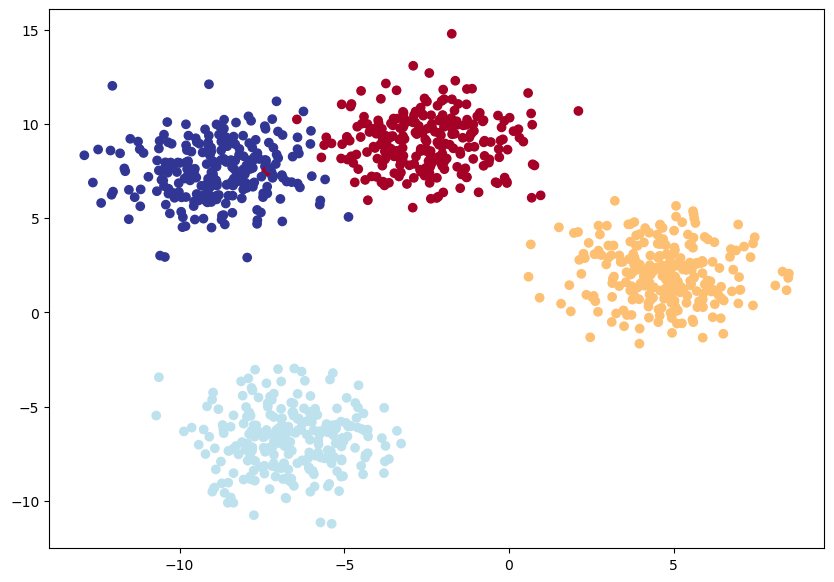

In [45]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
# print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [53]:
model = nn.Sequential(nn.Linear(2,10),
                      nn.ReLU(),
                      nn.Linear(10,10),
                      nn.ReLU(),
                      nn.Linear(10,NUM_CLASSES))

In [55]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [59]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

for epoch in range(epochs):
    ### Training
    model.train()

    # 1. Forward pass
    y_logits = model(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.40627, Acc: 1.62% | Test Loss: 1.37291, Test Acc: 1.00%
Epoch: 10 | Loss: 0.99293, Acc: 51.38% | Test Loss: 0.98699, Test Acc: 64.00%
Epoch: 20 | Loss: 0.50941, Acc: 91.00% | Test Loss: 0.51096, Test Acc: 90.00%
Epoch: 30 | Loss: 0.34822, Acc: 97.88% | Test Loss: 0.35120, Test Acc: 98.50%
Epoch: 40 | Loss: 0.20682, Acc: 99.00% | Test Loss: 0.19750, Test Acc: 99.50%
Epoch: 50 | Loss: 0.10386, Acc: 99.00% | Test Loss: 0.09480, Test Acc: 99.50%
Epoch: 60 | Loss: 0.06691, Acc: 99.00% | Test Loss: 0.05865, Test Acc: 99.50%
Epoch: 70 | Loss: 0.05237, Acc: 99.00% | Test Loss: 0.04409, Test Acc: 99.50%
Epoch: 80 | Loss: 0.04504, Acc: 99.00% | Test Loss: 0.03659, Test Acc: 99.50%
Epoch: 90 | Loss: 0.04067, Acc: 99.00% | Test Loss: 0.03205, Test Acc: 99.50%


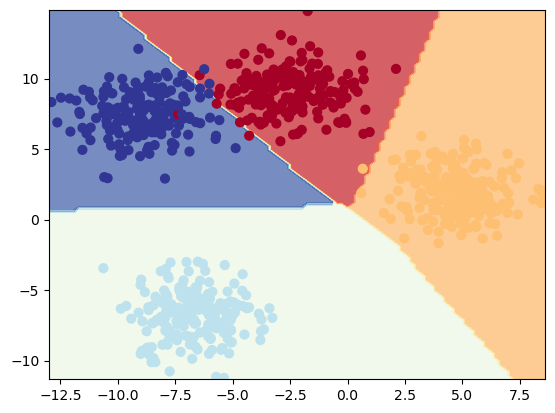

In [61]:
plot_decision_boundary(model, X_blob_train, y_blob_train)